> **DO NOT EDIT IF INSIDE `caobd_s19` folder** 

# Assignment 1

**Handin in Peergrade**: *Wednesday*, February 13, 2019, 23:59<br>
**Peergrading deadline**: *Sunday*, February 16, 2019, 23:59<br>
**Peergrading feedback deadline**: *Wednesday*, February 20, 2019, 23:59

[**Feedback**](http://ulfaslak.com/vent)

## Problems

### Week 1

>**Ex 1.1.10**: `dict`s and `defaultdict`s.
1. What is a `defaultdict`? How would you say it is different from a normal Python `dict`?
2. Write some code that takes a list of tuples:

>        l = [("a", 1), ("b", 3), ("a", None), ("c", False), ("b", True), ("a", None)]

>     And produces a `defaultdict` object

>        defaultdict(<type 'list'>, {'a': [1, None, None], 'c': [False], 'b': [3, True]})

>*Hint: you can import `defaultdict` from `collections`*

>**Ex. 1.2.4**: The URL reveals that the data is from reddit/r/gameofthrones, but can you recover that information from the data? Give your answer by 'keying' into the JSON data using square brackets.

>*Hint: 'Keying' is a word i just made up. By it, I mean the following. Consider a JSON object such as:*
>
>        my_json_obj = {
>            'cats': {
>                'awesome': ['Missy'],
>                'useless': ['Kim', 'Frank', 'Sandy']
>            },
>            'dogs': {
>                'awesome': ['Finn', 'Dolores', 'Fido', 'Casper'],
>                'useless': []
>            }
>        }
>
>*I can get the list of useless cats by keying into `my_json_obj` like such:*
>
>        >>> my_json_obj['cats']['useless']
>        Out [ ]: ['Kim', 'Frank', 'Sandy']
>
>*`my_json_obj['cats']` returns the dictionary `{'awesome': ['Missy'], 'useless': ['Kim', 'Frank', 'Sandy']}` and getting '`useless`' from that eventually gives us `['Kim', 'Frank', 'Sandy']`. If any of those list items were a list of a dictionary themselves, we could have kept keying deeper into the structure.*

>**Ex 1.2.5**: Write two `for` loops (or list comprehensions for extra street credits) which:
>1. Counts the number of spoilers.
>2. Only prints headlines that aren't spoilers.

### Week 2

>**Ex. 2.1.2**: The `get_x_y` function below gives you the number of comments versus score for the latest `N` posts on a given `subreddit`.
3. In two seperate figures, floating side by side, scatter plot (left) the set of x and y variables for "blackmirror" and (right) x and y for "news". Remember to transform the data. My figure looks like [this](http://ulfaslak.com/computational_analysis_of_big_data/exer_figures/example_2.2b.png).
4. Comment on any differences you see in the trends. Why might number of comments versus post upvotes look different for a TV-show than for world news?
>
>*Hint: By "transformation" I explicitly mean that you map some function onto every value in a list of values. Example: I can apply a square root transformation like `x = [np.sqrt(v) for v in x]`. A faster way to do that, of course, would be just `x = np.sqrt(x)`.*

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import requests as rq

def get_x_y(subreddit, N, count=25):
    
    def _get_data(subreddit, count, after):
        url = "https://www.reddit.com/r/%s/.json?count=%d&after=%s" % (subreddit, count, after)
        data = rq.get(url, headers = {'User-agent': 'sneakybot'}).json()
        print("Retrieved %d posts from page %s" % (count, after))
        return data
    
    after = ""

    x, y = [], []
    for n in range(N//count):
        data = _get_data(subreddit, count, after)
        for d in data['data']['children']:
            x.append(d['data']['num_comments'])
            y.append(d['data']['score'])
        after = data['data']['after']

    return x, y
                          
x, y = get_x_y("news", 500, count=25)
a, b = get_x_y("blackmirror", 500, count=25)

Retrieved 25 posts from page 
Retrieved 25 posts from page t3_apnykn
Retrieved 25 posts from page t3_apup8o
Retrieved 25 posts from page t3_aph1u9
Retrieved 25 posts from page t3_apduse
Retrieved 25 posts from page t3_ap5tro
Retrieved 25 posts from page t3_aotnqd
Retrieved 25 posts from page None
Retrieved 25 posts from page t3_apnykn
Retrieved 25 posts from page t3_apup8o
Retrieved 25 posts from page t3_aph1u9
Retrieved 25 posts from page t3_apduse
Retrieved 25 posts from page t3_ap5tro
Retrieved 25 posts from page t3_aotnqd
Retrieved 25 posts from page None
Retrieved 25 posts from page t3_apnykn
Retrieved 25 posts from page t3_apup8o
Retrieved 25 posts from page t3_aph1u9
Retrieved 25 posts from page t3_apduse
Retrieved 25 posts from page t3_ap5tro
Retrieved 25 posts from page 
Retrieved 25 posts from page t3_ap8uts
Retrieved 25 posts from page t3_aos3h4
Retrieved 25 posts from page t3_aob8k8
Retrieved 25 posts from page t3_anlp8j
Retrieved 25 posts from page t3_an0l4u
Retrieved 25 p

In [2]:
import numpy as np
x = np.log(x)
y = np.log(y)
a = np.log(a)
b = np.log(b)

/usr/local/Cellar/ipython/7.2.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
/usr/local/Cellar/ipython/7.2.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/Cellar/ipython/7.2.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/usr/local/Cellar/ipython/7.2.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


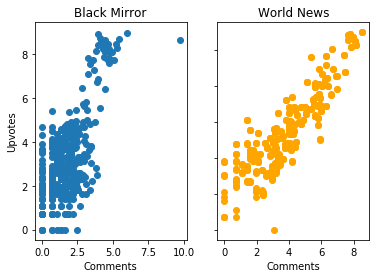

In [83]:
##Can't figure out how to set the scale properly, yscale=log does not work right

plt.subplot(1,2,1, ylabel="Upvotes", xlabel="Comments")
plt.title("Black Mirror")
plt.scatter(a,b)
#yticklabels=[0,10^0, 10^1, 30, 40 , 50]

plt.subplot(1,2,2, xlabel="Comments", yticklabels=[])
plt.title("World News")
plt.scatter(x,y,color="orange")

plt.show()

4. Comments on differences:
Posts in r/WorldNews appear to bring significantly more comments per upvote than the posts in r/blackmirror. This is probably due to the nature of the posts. For many news posts, there is a clear two-sided debate at play. This leads to more users commenting and arguing with each other. While this is certainly the case with some Black Mirror posts, many others are simple updates on the actors' personal lives or speculation about future episodes.



>**Ex. 2.2.4**: In Data Science, we often think of matrices as (usually two-dimensional) containers for data. Let's say we collect $N=500$ data points, that each has $M=10$ features. We can loslessly represent that data using an $N \times M$ matrix, that is a matrix that has a row for each datapoint and a column for each feature. In fact, let's just go ahead and do that by altering the code of the `get_x_y` function from before a little bit.
>
>*Note: `numpy` has an object type called `matrix` but we rarely use that. Instead, we represent matrices as a `numpy` object type called `array`.*

In [3]:
def get_data_matrix(subreddit, N, count=25):
    
    def _get_data(subreddit, count, after):
        url = "https://www.reddit.com/r/%s/.json?count=%d&after=%s" % (subreddit, count, after)
        data = rq.get(url, headers = {'User-agent': 'sneakybot'}).json()
        print("Retrieved %d posts from page %s" % (count, after))
        return data
    
    after = ""

    X = []
    for n in range(N//count):
        data = _get_data(subreddit, count, after)
        for d in data['data']['children']:
            X.append([
                int(d['data']['num_comments']),
                int(d['data']['score']),
                int(d['data']['ups']),
                int(d['data']['downs']),
                len(d['data']['selftext']),
                len(d['data']['title']),
                int(d['data']['is_original_content']),
                int(d['data']['spoiler']),
                int(d['data']['num_crossposts']),
                int(d['data']['is_video'])
            ])
        after = data['data']['after']

    return np.array(X)
                          
X = get_data_matrix("news", 500, count=25)

Retrieved 25 posts from page 
Retrieved 25 posts from page t3_apnykn
Retrieved 25 posts from page t3_apup8o
Retrieved 25 posts from page t3_aph1u9
Retrieved 25 posts from page t3_apduse
Retrieved 25 posts from page t3_ap5tro
Retrieved 25 posts from page t3_aotnqd
Retrieved 25 posts from page None
Retrieved 25 posts from page t3_apnykn
Retrieved 25 posts from page t3_apup8o
Retrieved 25 posts from page t3_aph1u9
Retrieved 25 posts from page t3_apduse
Retrieved 25 posts from page t3_ap5tro
Retrieved 25 posts from page t3_aotnqd
Retrieved 25 posts from page None
Retrieved 25 posts from page t3_apnykn
Retrieved 25 posts from page t3_apup8o
Retrieved 25 posts from page t3_aph1u9
Retrieved 25 posts from page t3_apduse
Retrieved 25 posts from page t3_ap5tro


In [4]:
X

array([[ 1120, 50362, 50362, ...,     0,     4,     0],
       [  161,   927,   927, ...,     0,     0,     0],
       [  653,  4836,  4836, ...,     0,     0,     0],
       ...,
       [   80,   770,   770, ...,     0,     2,     0],
       [   88,   586,   586, ...,     0,     0,     0],
       [  335,   503,   503, ...,     0,     1,     0]])

>Here are the data, but how can we summarize them? Let's start by finding the so-called *covariance matrix*.
1. Use the `np.cov` method on `X` to get its $10 \times 10$ covariance matrix.
2. Do you notice any characteristics of this matrix that are interesting? Comment.
3. Plot the distribution of covariances, e.g. using a histogram.

In [5]:
import numpy as np
c = np.cov(X)
print(c)

[[4.48323366e+08 8.01249458e+06 4.23985581e+07 ... 6.71964867e+06
  5.07363676e+06 4.09159044e+06]
 [8.01249458e+06 1.45535378e+05 7.65186489e+05 ... 1.21282556e+05
  9.20114000e+04 7.75228889e+04]
 [4.23985581e+07 7.65186489e+05 4.03822493e+06 ... 6.38830333e+05
  4.83809400e+05 4.03874444e+05]
 ...
 [6.71964867e+06 1.21282556e+05 6.38830333e+05 ... 1.01361167e+05
  7.67482778e+04 6.33003889e+04]
 [5.07363676e+06 9.20114000e+04 4.83809400e+05 ... 7.67482778e+04
  5.81947667e+04 4.86610556e+04]
 [4.09159044e+06 7.75228889e+04 4.03874444e+05 ... 6.33003889e+04
  4.86610556e+04 4.73833889e+04]]


The covariance matrix values are extremely high. This is supported by the graph we made earlier. When news posts recieve a lot of upvotes, they are likely to have a large storm of commments attached to them. 

Text(0.5, 0, 'covariance')

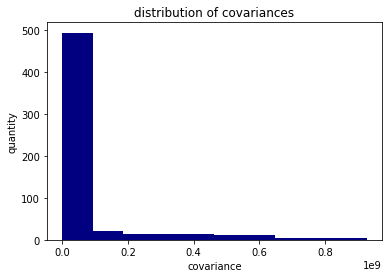

In [21]:
plt.hist(c, histtype="stepfilled", facecolor="navy")
plt.title("distribution of covariances")
plt.ylabel("quantity")
plt.xlabel("covariance")

>**Ex. 2.2.5**: There's another use of the covariance matrix, other than just learning how features co-vary. In fact, it turns out that the *eigenvectors* of the covariance matrix are a set of mutually orthogonal vectors, that point in the directions of greatest variance in the data. The eigenvector with the greatest *eigenvalue* points along the direction of greatest variation, and so on. This is pretty neat, because if we know along which axes the data is most stretched, we can figure out how best to project it when visualizing it in 2D as a scatter plot! This whole procedure has a name: **Principal Component Analysis** (PCA) and it was invented by Karl Pearson in 1901. It belongs to a powerful class of linear algebra methods called **Matrix Factorization** methods. Ok, so rather than spending too much time on the math of PCA, let's just use the `sklearn` implementation and fit a PCA on `X`.

In [13]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
pca.fit(X)
print(pca.explained_variance_ratio_)

[9.99441549e-01 5.56387277e-04 2.05478034e-06 8.76879679e-09
 1.05278837e-32 6.75195489e-42 5.24704250e-68 0.00000000e+00
 0.00000000e+00 0.00000000e+00]


>1. Explain what the matrix you get when you call `pca.components_` means.
2. Explain what the vector you get when you call `pca.explained_variance_ratio_` means. What insights about our data can we extract from this?
3. Transform X using the PCA you just fitted, and scatter plot the first two dimensions of the transformed data. Please comment on what you see.
3. Scatter plot dimensions 1 and 3 against each other. See something interesting now? What would be a way to figure out what the clusters represent?

1. The components matrix contains the set of all eigenvectors used in the principal component analysis. 
2. Explained_variance_ratio_ returns a vector of the variance explained by each direction. I think. This vector reflects the distribution in the histogram above, as the values suffer a steady dropoff as they progress in index.
3:

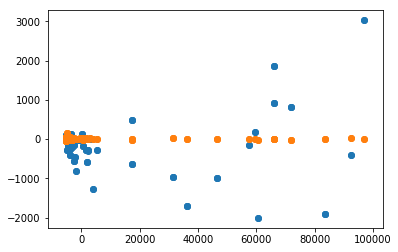

In [42]:
X_pca = pca.transform(X)
plt.scatter(X_pca[:,0], X_pca[:, 1])
plt.scatter(X_pca[:, 0], X_pca[:, 2])
plt.show()

>**Ex. 2.3.4**: People often use the p-value to gauge the *significance* of a given result. If the p-value of a result is low, the result is significant (which is good) and vice versa. Intuitively, the p-value measures the probabilty that a result *could have been obtained at random*, so you can imagine that if you find that the p-value for some result is HIGH (close to one), regardless of how cool it is, people will not care because, well, you just got lucky with that measurement, didn't you? I created two lists for you below, and you are going to find out if they are *significantly* correlated. You will be using the significance threshold 0.05 (which is arbitrary, disputed, yet very standard in the literature).

In [73]:
# You can incresae this to make the data more noisy (but let it be 4 for now)
noise_tmp =7

# I'm just seeding the random number generator here, so we can compare results
np.random.seed(0)

# This is your data
x = np.arange(0, 20) + np.random.normal(size=20) * noise_tmp
y = np.arange(0, 20) + np.random.normal(size=20) * noise_tmp
corr = stat.pearsonr(x,y)
print(corr)

(0.4063186052376271, 0.07544981254922296)


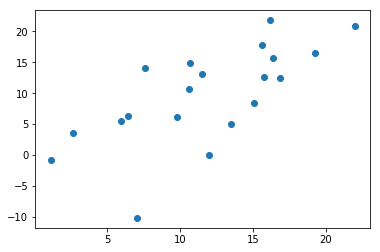

In [57]:
# Why not make a scatter plot here, to see what you're working with?
    
plt.scatter(x,y)
plt.show()

In [78]:
import scipy.stats as stat
ps = []
noise = []
noise_level = 1;
while(noise_level <  50):
    noise.append(noise_level)
    a = np.arange(0, 20) + np.random.normal(size=20) * noise_level
    b = np.arange(0, 20) + np.random.normal(size=20) * noise_level
    corr = stat.pearsonr(a,b)
    ps.append(corr[1])
    noise_level +=1


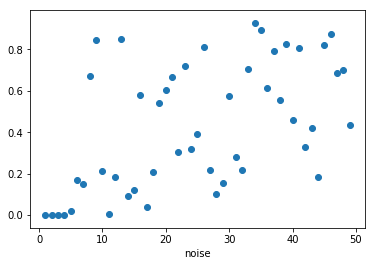

In [79]:
plt.scatter(noise,ps)
plt.xlabel("noise")
plt.show()

>4. Plot the p-value as a function of `noise_level` (let `noise_level` vary between 1 and 50), so we can see how our result becomes less and less significant as we increase the noise. Two questions: (1) at which value of `noise_level` does the correlation become insignificant, and (2) which p-value does the curve saturate at for large `noise_level`?

4. At noise_level 7, the correlation becomes insignificant. The curve does not saturate at any particular p-value. I'm not sure I understand your use of "the curve saturates at". But due to the randomness of the data, p-values close to .05 (and below) are still generated sometimes, even with high noise level.

### Week 3

>**Ex. 3.1.1**: From the Wikipedia API, get a list of all Marvel superheroes and another list of all Marvel supervillains. Use 'Category:Marvel_Comics_supervillains' and 'Category:Marvel_Comics_superheroes' to get the characters in each category.
1. How many superheroes are there? How many supervillains?
2. How many characters are both heroes and villains? What is the Jaccard similarity between the two groups?

>*Hint: Google something like "get list all pages in category wikimedia api" if you're struggling with the query.*

>**Ex. 3.2.1**: Extract the length of the page of each character, and plot the distribution of this variable for each class (heroes/villains/ambiguous). Can you say anything about the popularity of characters in the Marvel universe based on your visualization?

>*Hint: The simplest thing is to make a probability mass function, i.e. a normalized histogram. Use `plt.hist` on a list of page lengths, with the argument `density=True`. Other distribution plots are fine too, though.*

>**Ex. 3.2.2**: Find the 10 characters from each class with the longest Wikipedia pages. Visualize their page lengths with bar charts. Comment on the result.

>**Ex. 3.2.3**: We are interested in knowing if there is a time-trend in the debut of characters.
* Extract into three lists, debut years of heroes, villains, and ambiguous characters.
* Do all pages have a debut year? Do some have multiple? How do you handle these inconsistencies?
* For each class, visualize the amount of characters introduced over time. You choose how you want to visualize this data, but please comment on your choice. Also comment on the outcome of your analysis.

>*Hint: The debut year is given on the debut row in the info table of a character's Wiki-page. There are many ways that you can extract this variable. You should try to have a go at it yourself, but if you are short on time, you can use this horribly ugly regular expression code:*

>*`re.findall(r"\d{4}\)", re.findall(r"debut.+?\n", markup_text)[0])[0][:-1]`*